In [15]:
import numpy as np
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
%matplotlib inline

## df = pd.DataFrame({
##    'x': [12, 20, 28, 18, 29, 33, 24, 45, 45, 52, 51, 52, 55, 53, 55, 61, 64, 69, 72],
##    'y': [39, 36, 30, 52, 54, 46, 55, 59, 63, 70, 66, 63, 58, 23, 14, 8, 19, 7, 24],
##    'z': [25, 45, 27, 69, 61, 64, 33, 42, 21, 13, 17, 38, 37, 8, 22, 59, 44, 36, 52]
## })



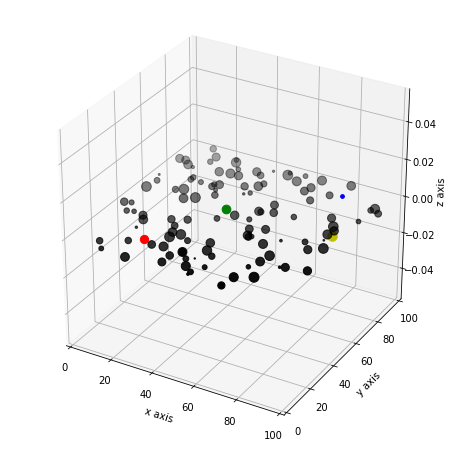

In [16]:
X=[]
Y=[]
Z=[]
for i in range(120):
    X.append(np.random.randint(0,100))
    Y.append(np.random.randint(0,100))
    Z.append(np.random.randint(0,100))
df = pd.DataFrame({
    'x': X,
    'y': Y,
    'z': Z

})

np.random.seed(200)
k = 4
# centroids[i] = [x, y]
centroids = {
    i+1: [np.random.randint(0,100), np.random.randint(0,100), np.random.randint(0,100)]
    for i in range(k)
}

fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(111, projection='3d')

plt.scatter(df['x'], df['y'], df['z'], color = 'k')
colmap = {1: 'r', 2: 'g', 3: 'b',4: 'y'}
for i in centroids.keys():
    plt.scatter(*centroids[i], color= colmap[i])
    
ax.set_xlabel('x axis')
ax.set_ylabel('y axis')
ax.set_zlabel('z axis')    
    
plt.xlim(0,100)
plt.ylim(0,100)
plt.show()
    

    x   y   z  distance_from_1  distance_from_2  distance_from_3  \
0  11   6  42        31.638584        67.216070       110.891839   
1  56   1   7        69.613217        88.729927        91.224997   
2  51  27  73        27.766887        29.563491        90.049986   
3  15   1  23        48.692915        80.336791       109.183332   
4  85  24   7        85.240835        87.011493        65.650590   

   distance_from_4  closest color  
0       105.877287        1     r  
1       105.285327        1     r  
2        52.497619        1     r  
3       115.186805        1     r  
4        88.594582        3     b  


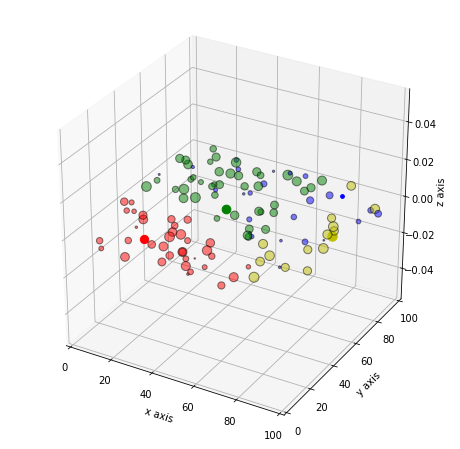

In [17]:
# Assignment stage

def assignment(df, centroids):
    for i in centroids.keys():
        # sqrt((x1 - x2)^2 - (y1 - y2)^2)
        df['distance_from_{}'.format(i)] = (
            np.sqrt(
                (df['x'] - centroids[i][0]) ** 2
                + (df['y'] - centroids[i][1]) ** 2
                + (df['z'] - centroids[i][2]) ** 2
            )
        )
    centroid_distance_cols = ['distance_from_{}'.format(i) for i in centroids.keys()]
    df['closest'] = df.loc[:, centroid_distance_cols].idxmin(axis=1)
    df['closest'] = df['closest'].map(lambda x: int(x.lstrip('distance_from_')))
    df['color'] = df['closest'].map(lambda x: colmap[x])
    return df

df = assignment(df, centroids)
print(df.head())

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')

plt.scatter(df['x'], df['y'], df['z'], color=df['color'], alpha=0.5, edgecolor='k')
for i in centroids.keys():
    plt.scatter(*centroids[i], color=colmap[i])
    
ax.set_xlabel('x axis')
ax.set_ylabel('y axis')
ax.set_zlabel('z axis')     
    
plt.xlim(0, 100)
plt.ylim(0, 100)
plt.show()

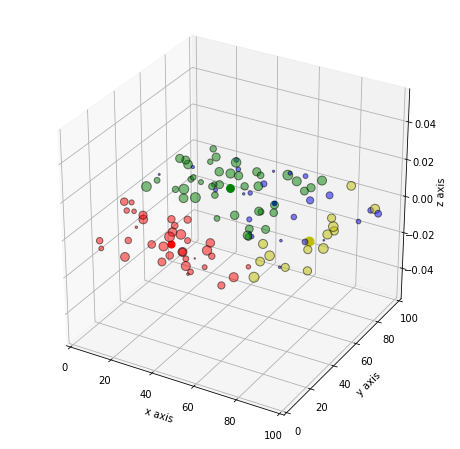

In [18]:
## Update Stage

import copy

old_centroids = copy.deepcopy(centroids)

def update(k):
    for i in centroids.keys():
        centroids[i][0] = np.mean(df[df['closest'] == i]['x'])
        centroids[i][1] = np.mean(df[df['closest'] == i]['y'])
        centroids[i][2] = np.mean(df[df['closest'] == i]['z'])
    return k

centroids = update(centroids)
    
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')

plt.scatter(df['x'], df['y'], df['z'], color=df['color'], alpha=0.5, edgecolor='k')
for i in centroids.keys():
    plt.scatter(*centroids[i], color=colmap[i])
plt.xlim(0, 100)
plt.ylim(0, 100)
for i in old_centroids.keys():
    old_x = old_centroids[i][0]
    old_y = old_centroids[i][1]
    old_z = old_centroids[i][2]
    dx = (centroids[i][0] - old_centroids[i][0]) * 0.75
    dy = (centroids[i][1] - old_centroids[i][1]) * 0.75
    dz = (centroids[i][2] - old_centroids[i][2]) * 0.75
 
ax.set_xlabel('x axis')
ax.set_ylabel('y axis')
ax.set_zlabel('z axis')     
    
plt.show()

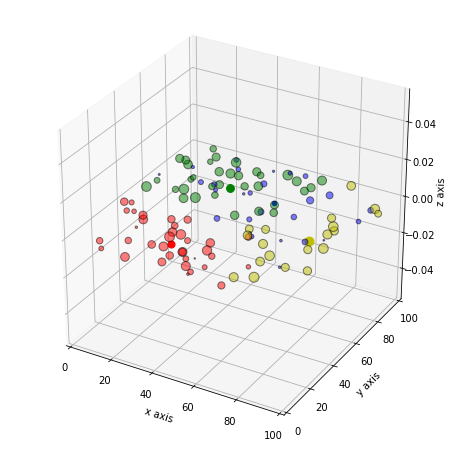

In [19]:
## Repeat Assigment Stage

df = assignment(df, centroids)

# Plot results
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')

plt.scatter(df['x'], df['y'], df['z'], color=df['color'], alpha=0.5, edgecolor='k')
for i in centroids.keys():
    plt.scatter(*centroids[i], color=colmap[i])
    
ax.set_xlabel('x axis')
ax.set_ylabel('y axis')
ax.set_zlabel('z axis')      
    
plt.xlim(0, 100)
plt.ylim(0, 100)
plt.show()


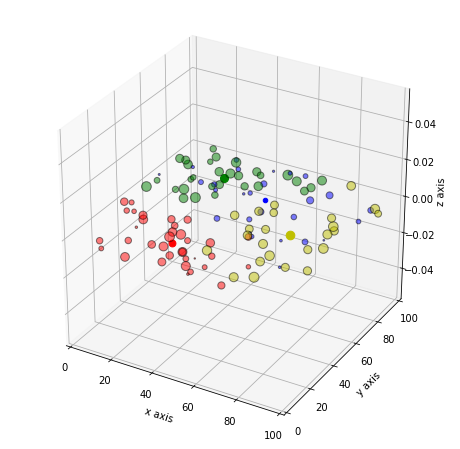

In [20]:
# Continue until all assigned categories don't change any more
while True:
    closest_centroids = df['closest'].copy(deep=True)
    centroids = update(centroids)
    df = assignment(df, centroids)
    if closest_centroids.equals(df['closest']):
        break

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')

plt.scatter(df['x'], df['y'], df['z'], color=df['color'], alpha=0.5, edgecolor='k')
for i in centroids.keys():
    plt.scatter(*centroids[i], color=colmap[i])
    
ax.set_xlabel('x axis')
ax.set_ylabel('y axis')
ax.set_zlabel('z axis')  

plt.xlim(0, 100)
plt.ylim(0, 100)
plt.show()

In [21]:
print(df)

      x   y   z  distance_from_1  distance_from_2  distance_from_3  \
0    11   6  42        29.913083        77.756929        79.019587   
1    56   1   7        47.240707       100.742940        69.904802   
2    51  27  73        30.677628        57.074863        67.594317   
3    15   1  23        37.273759        88.928848        78.289639   
4    85  24   7        62.010096        97.992211        57.366264   
5    22  54  77        48.928333        27.855700        66.205729   
6    16  70  35        56.628072        33.143225        39.556489   
7    31  32  45        14.702752        50.616927        49.835508   
8    59  45  61        36.672887        46.006594        47.762617   
9    20  85   0        82.736528        65.643532        41.649092   
10    3  55  95        69.536171        45.430606        90.790543   
11   56   3  33        27.920894        86.662218        67.760674   
12   72   0  52        39.666966        91.026040        78.707612   
13   90  61  70     

In [22]:
from collections import Counter, defaultdict
print(Counter(df.color))

Counter({'r': 37, 'g': 30, 'b': 29, 'y': 24})
